In [24]:
import numpy as np
import sympy as smp
import pandas as pd
from matplotlib import pyplot as plt
from scipy.misc import derivative as dirv

## differentiation

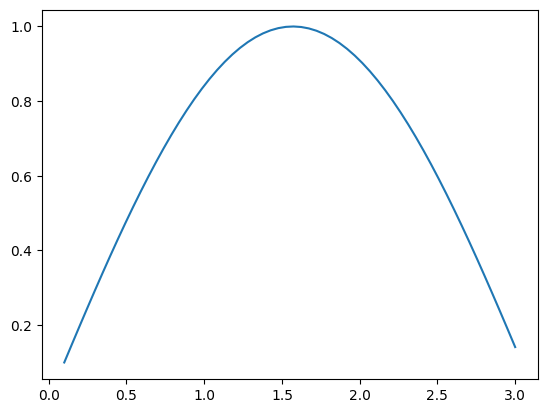

In [2]:
# our function
n = 60
t = np.linspace(0.1,3,n)
x = np.sin(t)
#plot it
plt.plot(t,x)

In [3]:
delX = abs(t[0] - t[1])

diff = np.zeros(np.size(t))
diff[0] = (x[1] - x[0])/(t[1] - t[0])
diff[-1] = (x[-1] - x[-2])/(t[-1] - t[-2])

for i in range(1,t.size-1):
    diff[i] = (x[i+1] - x[i])/(t[i+1] - t[i])


In [4]:
print(diff.size)
print(np.gradient(x).size)

60
60


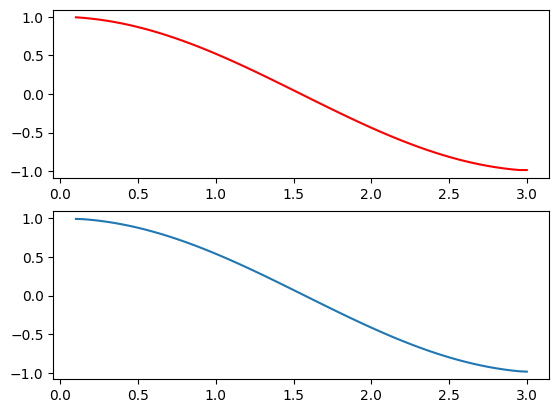

In [5]:
diff = np.array(diff)
fig, ax = plt.subplots(2)
ax[0].plot(t,diff,'r-')
ax[1].plot(t,np.gradient(x,t))

## Noisy

In [6]:
varience = 0.001
SD = np.sqrt(varience)
noise = np.random.normal(0.03, SD, n)

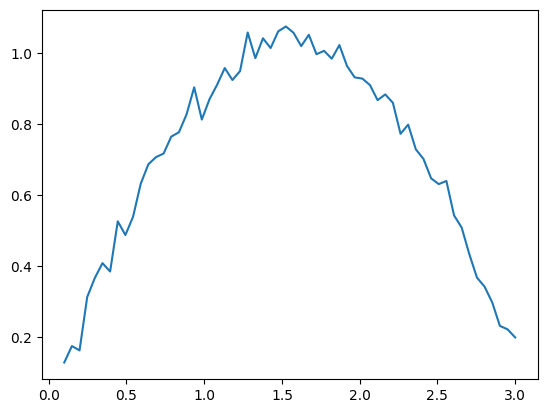

In [7]:
plt.plot(t,x+noise)

In [8]:
filt = np.ones(5)/5
x_smooth = np.convolve(x+noise, filt, mode='valid')

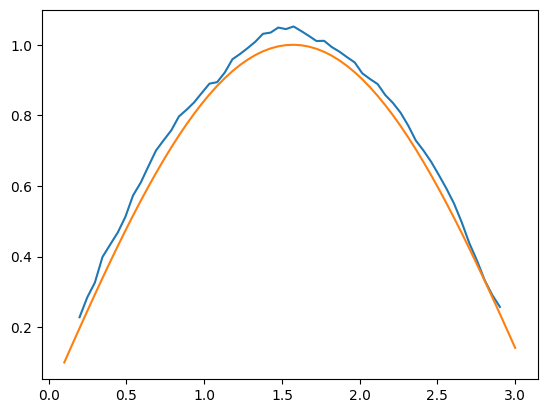

In [9]:
plt.plot(t[2:-2], x_smooth)
plt.plot(t,x)

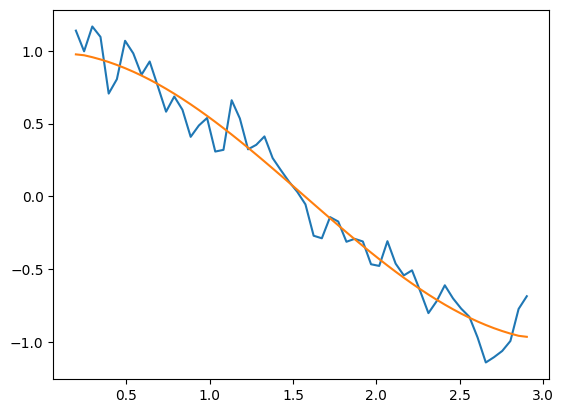

In [10]:
plt.plot(t[2:-2],np.gradient(x_smooth,t[2:-2]))
plt.plot(t[2:-2],np.gradient(x[2:-2],t[2:-2]))

In [59]:
np.convolve?

Signature: np.convolve(a, v, mode='full')
Docstring:
Returns the discrete, linear convolution of two one-dimensional sequences.

The convolution operator is often seen in signal processing, where it
models the effect of a linear time-invariant system on a signal [1]_.  In
probability theory, the sum of two independent random variables is
distributed according to the convolution of their individual
distributions.

If `v` is longer than `a`, the arrays are swapped before computation.

Parameters
----------
a : (N,) array_like
    First one-dimensional input array.
v : (M,) array_like
    Second one-dimensional input array.
mode : {'full', 'valid', 'same'}, optional
    'full':
      By default, mode is 'full'.  This returns the convolution
      at each point of overlap, with an output shape of (N+M-1,). At
      the end-points of the convolution, the signals do not overlap
      completely, and boundary effects may be seen.

    'same':
      Mode 'same' returns output of length ``max(M

## integration

In [11]:
from scipy.integrate import quad
from scipy.integrate import cumulative_trapezoid

In [18]:
def f(x):
    r = 1.0
    y = np.sqrt(r**2 - x**2)
    return y


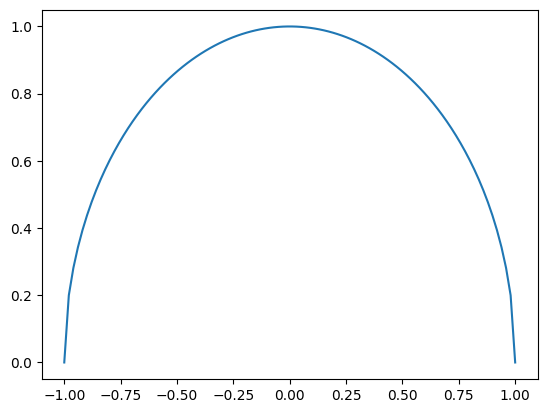

In [19]:
x = np.linspace(-1,1,100)
y = f(x)
plt.plot(x,y)

In [27]:
area = cumulative_trapezoid(y,x)
print(area)
print(np.pi/2)

[0.0020201  0.00688244 0.0131877  0.02062861 0.02903042 0.03827468
 0.04827349 0.05895783 0.07027137 0.08216676 0.09460336 0.10754565
 0.12096214 0.13482458 0.14910738 0.16378715 0.17884235 0.19425304
 0.21000061 0.22606762 0.24243767 0.25909524 0.27602562 0.29321478
 0.31064934 0.32831645 0.34620378 0.36429944 0.38259197 0.40107024
 0.41972348 0.43854122 0.45751324 0.47662959 0.49588054 0.51525656
 0.53474829 0.55434656 0.57404234 0.59382672 0.61369094 0.6336263
 0.65362424 0.67367625 0.6937739  0.71390881 0.73407266 0.75425715
 0.77445402 0.794655   0.81485187 0.83503636 0.85520021 0.87533512
 0.89543277 0.91548478 0.93548272 0.95541808 0.9752823  0.99506668
 1.01476246 1.03436073 1.05385246 1.07322848 1.09247943 1.11159578
 1.1305678  1.14938554 1.16803878 1.18651705 1.20480958 1.22290524
 1.24079257 1.25845968 1.27589423 1.2930834  1.31001378 1.32667135
 1.3430414  1.35910841 1.37485598 1.39026667 1.40532187 1.42000164
 1.43428444 1.44814688 1.46156337 1.47450566 1.48694226 1.49883

In [28]:
quad(f, -1, 1)

(1.5707963267948983, 1.0002354500215915e-09)

## interesting

In [1]:
import sympy as smp

In [11]:
x, y, r = smp.symbols('x,y,r', real = True, positive=True)
y = smp.sqrt(r**2 - x**2)

In [12]:
smp.integrate(y,(x,0,r))

pi*r**2/4

In [19]:
x, y, r, h = smp.symbols('x,y,r,h', real = True, positive=True)
x = smp.sqrt(r**2 - y**2)
f = smp.pi*x**2
smp.integrate(f,(y,0,h)).simplify()

pi*h*(-h**2 + 3*r**2)/3

# Optimization
[link](https://math.libretexts.org/Bookshelves/Calculus/Map%3A_Calculus__Early_Transcendentals_(Stewart)/04%3A_Applications_of_Differentiation/4.07%3A_Optimization_Problems)

In [25]:
from scipy.optimize import minimize
def f(x):
    t = (x/8) + np.sqrt((6-x)**2 + 4)/3
    return t

In [53]:
minimize?

<function scipy.optimize._minimize.minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)>

![Capture](Capture.PNG)

In [55]:
def f(x):
    return x[0]*x[3]*(x[0] + x[1] + x[2]) + x[2]

cons = [{'type': 'ineq', 'fun': lambda x: x[0]*x[1]*x[2]*x[3] - 25},
        {'type': 'eq', 'fun': lambda x: x[0]**2 + x[1]**2 + x[2]**2 + x[3]**2 - 40}]

bnds = ([1,5],[1,5],[1,5],[1,5])

x0 = [1,5,5,1]
ans = minimize(f,x0=x0,method='SLSQP',constraints=cons,bounds=bnds)
print(ans)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 17.01401724556073
       x: [ 1.000e+00  4.743e+00  3.821e+00  1.379e+00]
     nit: 5
     jac: [ 1.457e+01  1.379e+00  2.379e+00  9.564e+00]
    nfev: 25
    njev: 5
